<a href="https://colab.research.google.com/github/khusbu-verma/Review-Sentiment-Prediction/blob/main/Updated%20File%20Review_Sentiment_Prediction_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries and Dataset

In [19]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier 
import matplotlib.pyplot as plt 

from sklearn import metrics
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import unicodedata
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string 
from nltk.stem import WordNetLemmatizer
import re
import copy

from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix,classification_report
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score,auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas import get_dummies
import matplotlib as mpl
from scipy import stats
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn


In [5]:
df_train= pd.read_csv('TRAIN.csv',index_col=0)
df_test = pd.read_csv('TEST.csv',index_col=0)


##Basic Insights of the Data


In [7]:
df_train.head()

,text,category
id,,
3973,1047 6700 4178 2912 183 6700,0
4462,4035 4563 1994 154 5373 4956 6035 4393 4017 40...,1
2889,5035 7685 3139 4407 254 584 6589 8518 3078,0
3457,1047 2540 2578 6700 2242 230 3771 4676 5881 64...,0
1555,7685 5868 237 6794 3078,0


In [8]:
df_train.tail()

,text,category
id,,
1955,6448 4179 6527 2734 6927 6527 5773,0
4738,1774 226 4017 6084 5868 237 2134 2734 442 3485...,0
2884,676 6488 8406 7168 7526 3285 5922 8207 1280 23...,0
3986,4460 3601 6700 6383 3309 154 2698 1068 237 747...,0
4126,3757 4626 1260 77 3078 2404 1819 7526,0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2598 entries, 3973 to 4126
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      2598 non-null   object
 1   category  2598 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 60.9+ KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866 entries, 1546 to 3225
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    866 non-null    object
dtypes: object(1)
memory usage: 13.5+ KB


In [11]:
df_train.describe(include=object)

,text
count,2598
unique,2501
top,425 230 1207 5326 3825
freq,15


In [12]:
df_train.describe()

,category
count,2598.000000
mean,0.033102
std,0.178938
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [13]:
print(df_train.shape)
print(df_test.shape)

(2598, 2)
(866, 1)


##Basic EDA


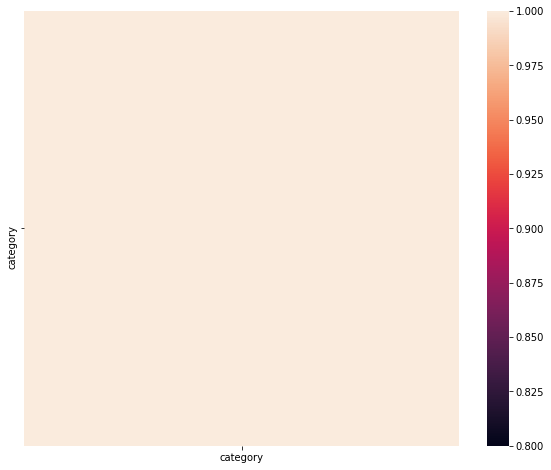

In [14]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

Correlation

When two sets of data are strongly linked together we say they have a High Correlation.

The word Correlation is made of Co- (meaning "together"), and Relation

Correlation is Positive when the values increase together, and Correlation is Negative when one value decreases as the other increases A correlation is assumed to be linear (following a line).

correlation examples Correlation can have a value:

1 is a perfect positive correlation 0 is no correlation (the values don't seem linked at all) -1 is a perfect negative correlation The value shows how good the correlation is (not how steep the line is), and if it is positive or negative.

In [15]:
temp = df_train.groupby('category').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,category,text
0,0,2512
1,1,86


In [16]:
# method to add percentage on the plot
sns.set()
total = float(len(df_train))
def add_percentage(ax, total):
    for i in ax.patches:
        height = i.get_height()
        ax.text(i.get_x()+i.get_width()/2.,height + 5,'{:1.2f}'.format(height/total*100) + '%')

#Check for Class Imbalance


In [25]:
df_train['category'].value_counts()/len(df_train)

0    0.966872
1    0.033128
Name: category, dtype: float64

In [20]:
fig = go.Figure(go.Funnelarea(
    text =temp.category,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

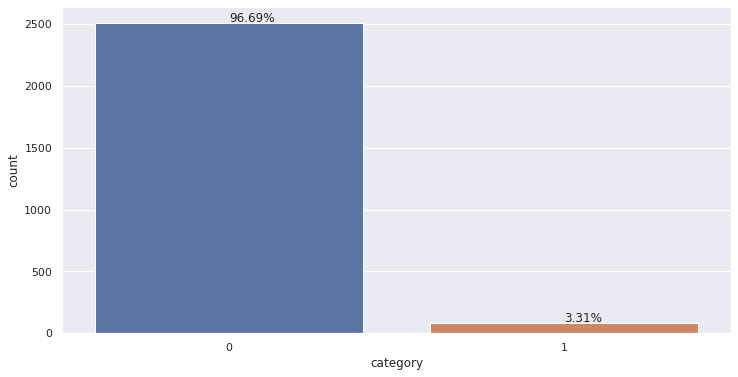

In [17]:
plt.figure(figsize=(12,6))
ax =  sns.countplot(df_train.category)
add_percentage(ax, total)

#Train Test Split


In [30]:
X=df_train['text']
y=df_train['category']

In [31]:
def run_model(dataframe,
              target,
              vectorizer=TfidfVectorizer(ngram_range=(1, 2), max_df=0.9, min_df=0.02),
              model=MultinomialNB()
             ):
    '''
    Performs model training and validate using f1-score
    '''
    X = dataframe
    y = target
    vect = vectorizer
    
    # splitting data into training and validation set
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size=0.3)
    
    # Vectorize
    vector = vect.fit(X_train)
    X_train_vect = vector.transform(X_train).toarray()
    X_valid_vect = vector.transform(X_valid).toarray()
    
    # Fit and predict
    model.fit(X_train_vect, y_train)  
    y_pred = model.predict(X_valid_vect)  
    
    #validation using f1-score
    c_report = metrics.classification_report(y_valid, y_pred)
    print('classification report: \n', c_report)
    F1_score = f1_score(y_valid, y_pred,average='weighted')
    print('F1_score: ',F1_score) 
    
    return F1_score, y_pred

In [32]:



from sklearn import metrics
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
models = [MultinomialNB, GaussianNB,LogisticRegression,DecisionTreeClassifier, RandomForestClassifier]
vectorizers = [TfidfVectorizer, CountVectorizer]
for vectorizer in vectorizers:
  vectorizer = vectorizer(max_df=0.9, min_df=0.02)
  for model in models:
      # run model
      model = model()
      F1_score, y_pred = run_model(X, y, vectorizer = vectorizer, model = OneVsRestClassifier(model)) 
      print('On Model - \n'+str(model),'\nwith Vectorizer - \n'+str(vectorizer))
      print('===='*20)

classification report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       753
           1       0.00      0.00      0.00        26

    accuracy                           0.97       779
   macro avg       0.48      0.50      0.49       779
weighted avg       0.93      0.97      0.95       779

F1_score:  0.9502190329035349
On Model - 
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 
with Vectorizer - 
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=0.02, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
classification report: 
     

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier


def ensemble(dataframe,target):
    X = dataframe
    y = target
    
    tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=0.01, max_features=1000)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
     
    # TF-IDF feature matrix
    tfidf_vectorizer.fit(X_train)
    X_train_vect = tfidf_vectorizer.transform(X_train).toarray()
    X_valid_vect = tfidf_vectorizer.transform(X_valid).toarray()
    
    
    smote = SMOTE(random_state=0)
    
    X_train_vect_sm, y_train_sm =  smote.fit_sample(X_train_vect, y_train)
    #print("X_train_vect_sm shape after smote: ",X_train_vect_sm.shape)

    
   
    model1 = RandomForestClassifier(random_state=0, n_jobs=-1, 
                                    class_weight="balanced", 
                                    criterion = 'gini',max_depth= 8,
                                    max_features = 'auto', n_estimators = 200
                                    )
    model2 = MultinomialNB()
    model3 = LogisticRegression(class_weight="balanced")
    
    model = VotingClassifier(estimators=[('rf', model1),('nb', model2), ('lr', model3)], voting='soft')
    
    model.fit(X_train_vect_sm, y_train_sm)
    y_pred = model.predict(X_valid_vect) 
    
    #validation using f1-score
    c_report = metrics.classification_report(y_valid, y_pred)
    print('classification report: \n', c_report)
    F1_score = f1_score(y_valid, y_pred,average='weighted')
    print('F1_score: ',F1_score) 
    
    return tfidf_vectorizer, model

ensemble(X,y)

classification report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       758
           1       0.82      0.86      0.84        21

    accuracy                           0.99       779
   macro avg       0.91      0.93      0.92       779
weighted avg       0.99      0.99      0.99       779

F1_score:  0.9911156419997612


(TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                 dtype=<class 'numpy.float64'>, encoding='utf-8',
                 input='content', lowercase=True, max_df=0.9, max_features=1000,
                 min_df=0.01, ngram_range=(1, 1), norm='l2', preprocessor=None,
                 smooth_idf=True, stop_words=None, strip_accents=None,
                 sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                 tokenizer=None, use_idf=True, vocabulary=None),
 VotingClassifier(estimators=[('rf',
                               RandomForestClassifier(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      class_weight='balanced',
                                                      criterion='gini',
                                                      max_depth=8,
                                                      max_features='auto',
                         

#Basic Transformations


In [21]:
df_train['Num_words_text'] = df_train['text'].apply(lambda x:len(str(x).split())) 

In [22]:
df_train.sort_values(by=['Num_words_text'],axis=0, ascending=False)

,text,category,Num_words_text
id,,,
3735,1761 753 8554 7127 2995 2269 3291 7669 5773 36...,0,6290
1504,3182 1582 1872 2698 667 6556 237 6527 6980 764...,0,185
2490,1452 3983 7924 5922 7450 4801 7186 1944 6980 8...,0,158
2011,1947 3919 4462 5922 8313 5773 6032 5665 8528 4...,0,116
4366,1947 3919 4462 5922 8313 5773 6032 5665 8528 4...,0,116
...,...,...,...
2329,427,0,1
3823,6451,0,1
4733,7513,0,1


In [23]:
df_train.drop(df_train[df_train['Num_words_text'] >158].index, inplace = True) 

In [24]:
df_train.sort_values(by=['Num_words_text'],axis=0, ascending=False)

,text,category,Num_words_text
id,,,
2490,1452 3983 7924 5922 7450 4801 7186 1944 6980 8...,0,158
2011,1947 3919 4462 5922 8313 5773 6032 5665 8528 4...,0,116
4366,1947 3919 4462 5922 8313 5773 6032 5665 8528 4...,0,116
4167,4580 230 2698 5035 2889 5035 1579 237 5492 421...,0,110
2021,676 5792 5101 230 6277 2734 2230 7210 5922 494...,0,105
...,...,...,...
2329,427,0,1
3823,6451,0,1
4733,7513,0,1


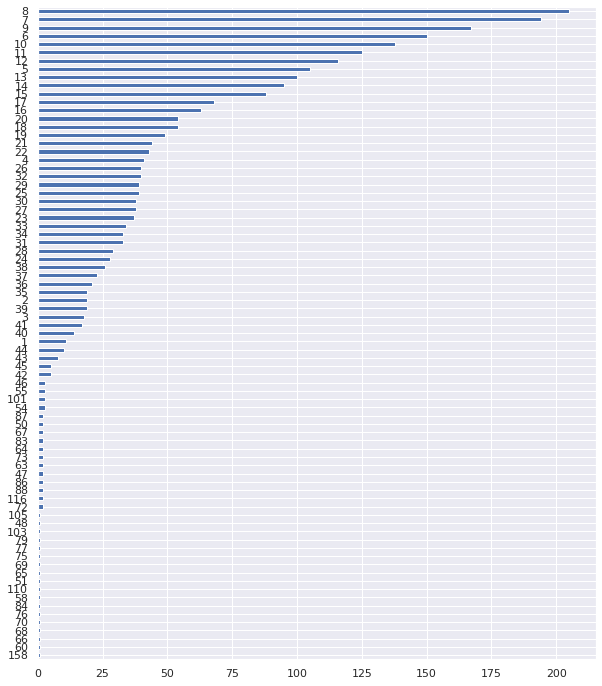

In [26]:
df_train.Num_words_text.value_counts(ascending=True).plot.barh(figsize=(10,12))

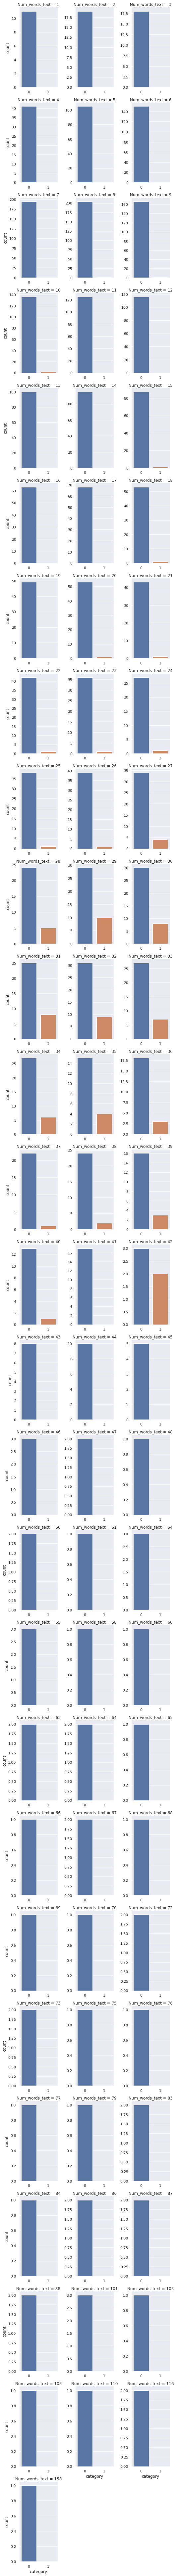

In [27]:
sns.factorplot(x = 'category',data=df_train,order=[0,1],
               kind = 'count',col_wrap=3,col='Num_words_text',size=4,aspect=0.6,sharex=False,sharey=False)
plt.show()


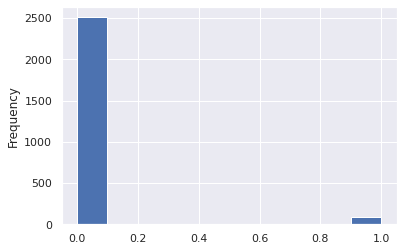

In [28]:
df_train['category'].plot(kind='hist')

#--Transformed Train Test Split


In [ ]:
df=df_train['text'].str.split(' ', expand=True)


In [ ]:
df['category']=df_train['category']

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,category
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3973,1047,6700,4178,2912,183,6700,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0
4462,4035,4563,1994,154,5373,4956,6035,4393,4017,4035,1556,5922,3412,5615,5328,6055,4457,6361,6429,3376,3376,5773,3746,8621,5773,8407,6055,4017,482,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1
2889,5035,7685,3139,4407,254,584,6589,8518,3078,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0
3457,1047,2540,2578,6700,2242,230,3771,4676,5881,6465,3777,468,2641,3207,6855,6589,2492,237,5071,6700,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0
1555,7685,5868,237,6794,3078,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2596 entries, 3973 to 4126
Columns: 159 entries, 0 to category
dtypes: int64(1), object(158)
memory usage: 3.2+ MB


In [ ]:
df.describe()

,category
count,2596.000000
mean,0.033128
std,0.179005
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df.fillna(value=0,inplace=True)

In [ ]:
X=df.drop(['category'],axis=1)
#X=df_train['text']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y, random_state = 3)

##--Logistics Regression

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print("Accuracy = " , accuracy_score(y_test, y_test_pred))
print("Precision = " ,precision_score(y_test, y_test_pred))
print("Recall = " ,recall_score(y_test, y_test_pred))
print("F1 Score = " ,f1_score(y_test, y_test_pred))
print('Confusion Matrix',confusion_matrix(y_test, y_test_pred))

#pd.crosstab(y_test_pred, y_test['category'], rownames=['Predicted'], colnames=['Actual'])

Accuracy =  0.9602053915275995
Precision =  0.3684210526315789
Recall =  0.2692307692307692
F1 Score =  0.3111111111111111
Confusion Matrix [[741  12]
 [ 19   7]]


In [ ]:

clf = LogisticRegression(class_weight='balanced').fit(X_train, y_train)

y_test_pred_balanced = clf.predict(X_test)
print("Accuracy = " , accuracy_score(y_test, y_test_pred))
print("Precision = " ,precision_score(y_test, y_test_pred))
print("Recall = " ,recall_score(y_test, y_test_pred))
print("F1 Score = " ,f1_score(y_test, y_test_pred))
print('Confusion Matrix',confusion_matrix(y_test, y_test_pred))

Accuracy =  0.9602053915275995
Precision =  0.3684210526315789
Recall =  0.2692307692307692
F1 Score =  0.3111111111111111
Confusion Matrix [[741  12]
 [ 19   7]]


##--SVM


In [ ]:
from sklearn.linear_model import SGDClassifier
svm_clf = SGDClassifier(loss="hinge", penalty='l2')
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
print("Accuracy = " , accuracy_score(y_test, svm_pred))
print("Precision = " ,precision_score(y_test, svm_pred))
print("Recall = " ,recall_score(y_test, svm_pred))
print("F1 Score = " ,f1_score(y_test, svm_pred))
print('Confusion Matrix',confusion_matrix(y_test, svm_pred))

Accuracy =  0.9178433889602053
Precision =  0.16071428571428573
Recall =  0.34615384615384615
F1 Score =  0.21951219512195125
Confusion Matrix [[706  47]
 [ 17   9]]


##--Random Forest


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor ,RandomForestRegressor

                               
rfc=RandomForestClassifier(n_estimators=500,random_state=3, max_features = 'sqrt', n_jobs=-1, verbose = 1)
rfc.fit(X_train,y_train)
#rfc.fit(X_train,y_train)
rfc_prediction = rfc.predict(X_test)
print("Accuracy = " , accuracy_score(y_test, rfc_prediction))
print("Precision = " ,precision_score(y_test, rfc_prediction))
print("Recall = " ,recall_score(y_test, rfc_prediction))
print("F1 Score = " ,f1_score(y_test, rfc_prediction))
print('Confusion Matrix',confusion_matrix(y_test, rfc_prediction))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.2s finished


Accuracy =  0.9679075738125802
Precision =  1.0
Recall =  0.038461538461538464
F1 Score =  0.07407407407407407
Confusion Matrix [[753   0]
 [ 25   1]]


##--Bagging Classifier


In [ ]:
bca =BaggingClassifier()
bca.fit(X_train,y_train)
bca_prediction = bca.predict(X_test)
print("Accuracy = " , accuracy_score(y_test, bca_prediction))
print("Precision = " ,precision_score(y_test, bca_prediction))
print("Recall = " ,recall_score(y_test, bca_prediction))
print("F1 Score = " ,f1_score(y_test, bca_prediction))
print('Confusion Matrix',confusion_matrix(y_test, bca_prediction))

Accuracy =  0.9653401797175867
Precision =  0.3333333333333333
Recall =  0.038461538461538464
F1 Score =  0.06896551724137931
Confusion Matrix [[751   2]
 [ 25   1]]


#Model Selection


In [35]:
final_vectrizer, final_model = ensemble(X, y)
X_test_vect = final_vectrizer.transform(df_test['text']).toarray()

final_pred = final_model.predict(X_test_vect)

classification report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       758
           1       0.82      0.86      0.84        21

    accuracy                           0.99       779
   macro avg       0.91      0.93      0.92       779
weighted avg       0.99      0.99      0.99       779

F1_score:  0.9911156419997612


In [ ]:
submission_file = pd.DataFrame(prediction,columns = ['category'])

In [ ]:
submission_file.set_index('category', inplace=True)
submission_file.head()

In [ ]:
submission_file.to_csv('submission_file.csv', index=True)